In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
print('Shape of Data:', df.shape)
df.head()

Shape of Data: (69999, 172)


,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [ ]:
df_type=df.dtypes
df_type.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [ ]:
df_type[df_type=='int64'].shape

(28,)

In [ ]:
df_type[df_type=='float64'].shape

(135,)

In [ ]:
df_type[df_type=='O'].shape

(9,)

,NaN,ratio_NaN
arpu_3g_6,52431,74.902499
count_rech_2g_6,52431,74.902499
night_pck_user_6,52431,74.902499
arpu_2g_6,52431,74.902499
date_of_last_rech_data_6,52431,74.902499
total_rech_data_6,52431,74.902499
av_rech_amt_data_6,52431,74.902499
max_rech_data_6,52431,74.902499
count_rech_3g_6,52431,74.902499
fb_user_6,52431,74.902499


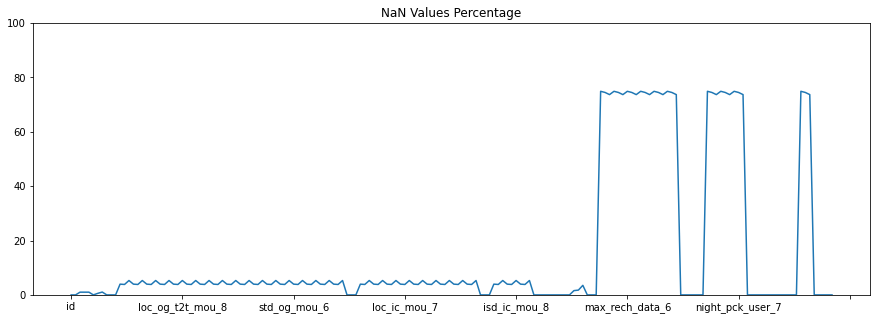

In [ ]:
df_missing=pd.DataFrame(df.isna().sum(),columns=['NaN'])
df_missing['ratio_NaN']=df_missing['NaN']/df.shape[0]*100
display(df_missing.sort_values('ratio_NaN',ascending=False).head(10))
fig,ax=plt.subplots(figsize=(20,10))
df_missing['ratio_NaN'].plot(ylim=(0, 100), figsize=(15,5))
plt.title('NaN Values Percentage')
plt.show()

,NaN,ratio_NaN
roam_og_mou_8,3703,5.290076
og_others_8,3703,5.290076
spl_og_mou_8,3703,5.290076
loc_ic_t2t_mou_8,3703,5.290076
loc_og_t2m_mou_8,3703,5.290076
loc_og_t2c_mou_8,3703,5.290076
loc_ic_t2m_mou_8,3703,5.290076
loc_og_t2t_mou_8,3703,5.290076
loc_ic_t2f_mou_8,3703,5.290076
std_og_t2f_mou_8,3703,5.290076


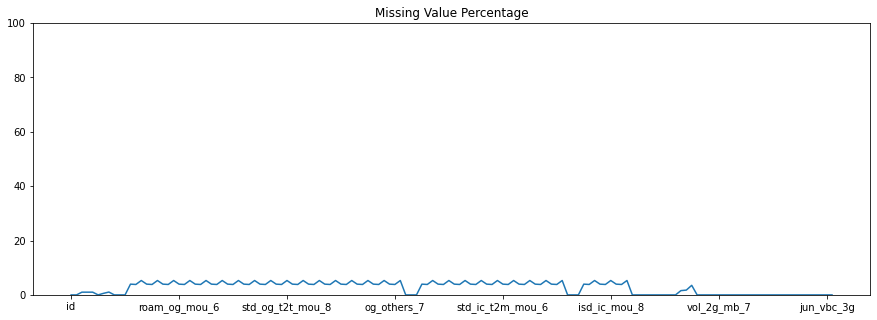

In [ ]:
df1=df.drop(df_missing[df_missing['ratio_NaN']>10].index,axis=1)
df_missing=pd.DataFrame(df1.isna().sum(),columns=['NaN'])
df_missing['ratio_NaN']=df_missing['NaN']/df1.shape[0]*100
display(df_missing.sort_values('ratio_NaN',ascending=False).head(10))
fig,ax=plt.subplots(figsize=(20,10))
df_missing['ratio_NaN'].plot(ylim=(0, 100), figsize=(15,5))
plt.title('Missing Value Percentage')
plt.show()

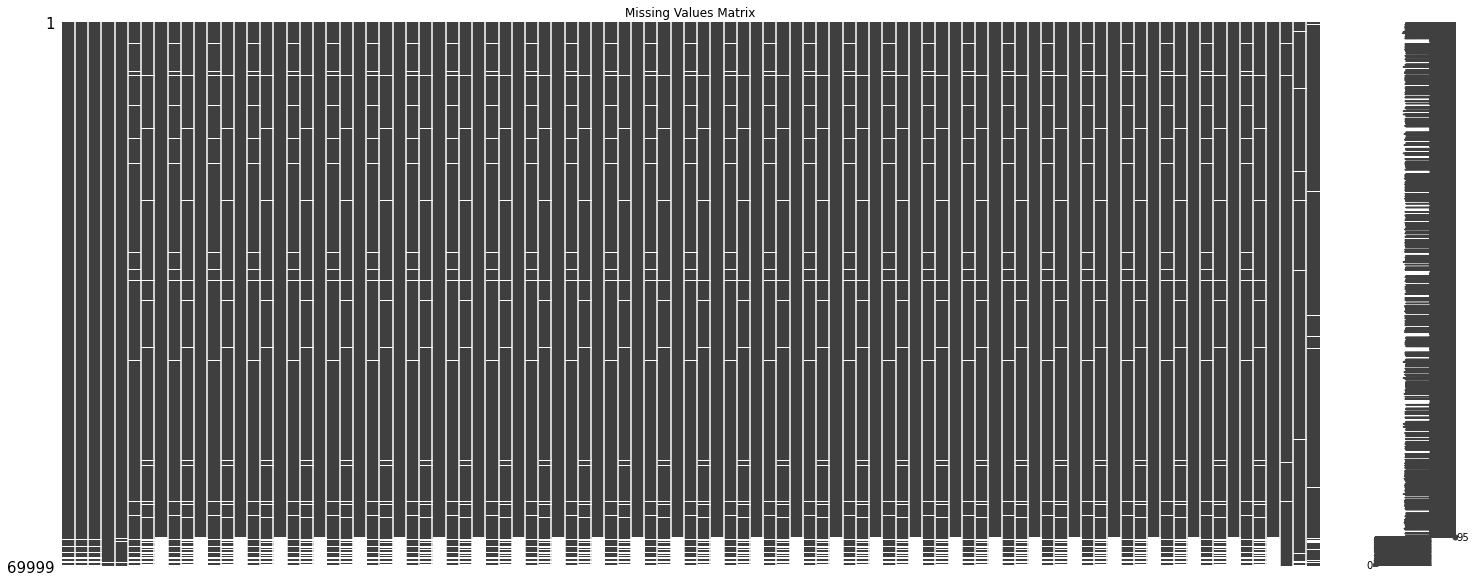

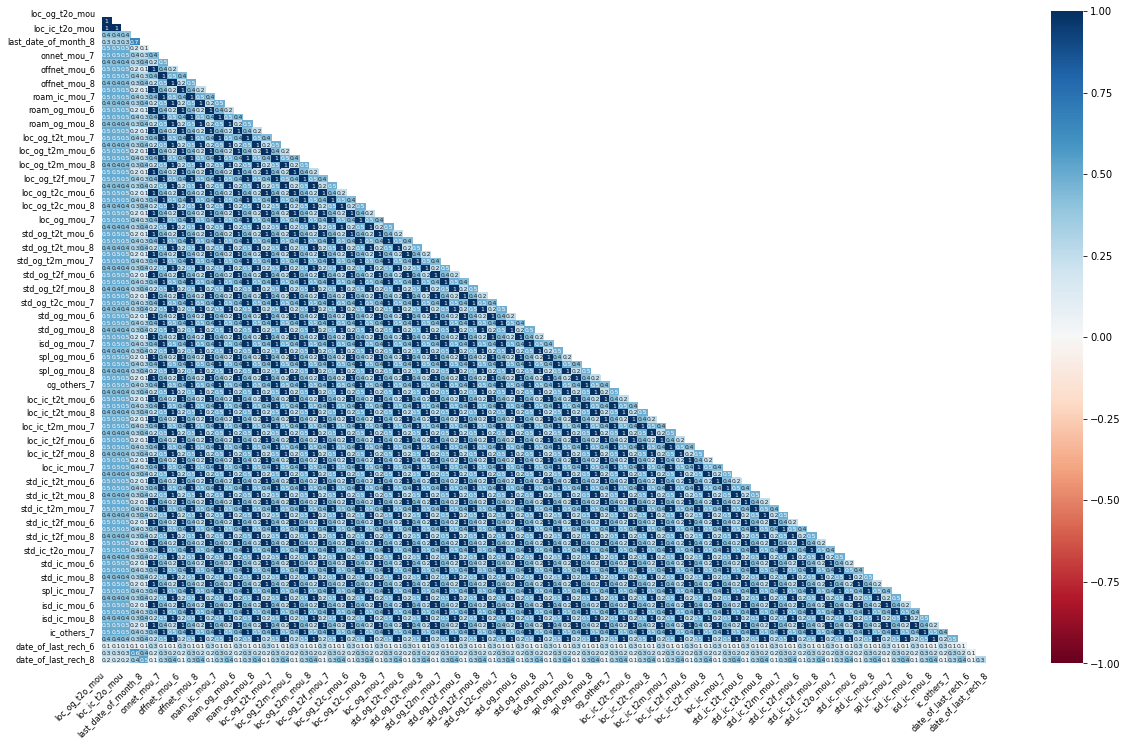

In [ ]:
import missingno as msno
msno.matrix(df1.loc[:,df_missing[(df_missing['ratio_NaN']>0)&(df_missing['ratio_NaN']<70)].index].sort_values('roam_og_mou_8'),fontsize=12)
plt.title('Missing Values Matrix')
plt.show()
msno.heatmap(df1.loc[:,df_missing[(df_missing['ratio_NaN']>0)&(df_missing['ratio_NaN']<70)].index].sort_values('roam_og_mou_8'),fontsize=8)

In [ ]:
display(df_type[df_type.index.isin(df_missing[df_missing['ratio_NaN']>0].index)].value_counts())
df_type1=df1.dtypes
display(df1[df_type1[df_type1=='O'].index])

float64    90
object      5
dtype: int64

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014
...,...,...,...,...,...,...
69994,6/30/2014,7/31/2014,8/31/2014,6/18/2014,7/31/2014,8/31/2014
69995,6/30/2014,7/31/2014,8/31/2014,6/28/2014,7/31/2014,8/27/2014
69996,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/30/2014,8/29/2014
69997,6/30/2014,7/31/2014,8/31/2014,6/29/2014,7/19/2014,8/26/2014


In [ ]:
def create_woe_iv(df,feature,target):
    return (pd.crosstab(df[feature],df[target],normalize='columns')
            .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
            .assign(iv=lambda dfx: np.sum(dfx['woe']*(dfx[1]-dfx[0]))))

df_woe_iv = create_woe_iv(df,'date_of_last_rech_6','churn_probability')
display(df_woe_iv)

df_woe_iv = create_woe_iv(df,'date_of_last_rech_7','churn_probability')
display(df_woe_iv)

df_woe_iv = create_woe_iv(df,'date_of_last_rech_8','churn_probability')
display(df_woe_iv)

churn_probability,0,1,woe,iv
date_of_last_rech_6,,,,
6/1/2014,0.002144,0.003211,0.404029,0.038717
6/10/2014,0.002563,0.005984,0.848003,0.038717
6/11/2014,0.005319,0.009924,0.623751,0.038717
6/12/2014,0.025384,0.024956,-0.017012,0.038717
6/13/2014,0.021677,0.017951,-0.188629,0.038717
6/14/2014,0.038794,0.040718,0.048411,0.038717
6/15/2014,0.008381,0.012405,0.392158,0.038717
6/16/2014,0.011266,0.012259,0.084502,0.038717
6/17/2014,0.041647,0.044221,0.059974,0.038717


churn_probability,0,1,woe,iv
date_of_last_rech_7,,,,
7/1/2014,0.000594,0.002470,1.425012,0.174829
7/10/2014,0.007706,0.015591,0.704675,0.174829
7/11/2014,0.003564,0.008645,0.886015,0.174829
7/12/2014,0.006149,0.014665,0.869183,0.174829
7/13/2014,0.003195,0.006175,0.658916,0.174829
7/14/2014,0.004078,0.008953,0.786450,0.174829
7/15/2014,0.014016,0.035350,0.925127,0.174829
7/16/2014,0.023970,0.029948,0.222656,0.174829
7/17/2014,0.027791,0.028404,0.021822,0.174829


churn_probability,0,1,woe,iv
date_of_last_rech_8,,,,
8/1/2014,0.001877,0.009569,1.628633,0.646282
8/10/2014,0.003706,0.003305,-0.114393,0.646282
8/11/2014,0.005583,0.007481,0.292545,0.646282
8/12/2014,0.006409,0.017919,1.028204,0.646282
8/13/2014,0.007234,0.011308,0.446718,0.646282
8/14/2014,0.008594,0.012178,0.348623,0.646282
8/15/2014,0.007914,0.014788,0.625178,0.646282
8/16/2014,0.008124,0.007307,-0.106041,0.646282
8/17/2014,0.007347,0.008177,0.106940,0.646282


In [ ]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df1[df_type1[df_type1=='float64'].index]=imp_mean.fit_transform(df1[df_type1[df_type1=='float64'].index])

# Exploratory Data Analysis

0    62867
1     7132
Name: churn_probability, dtype: int64

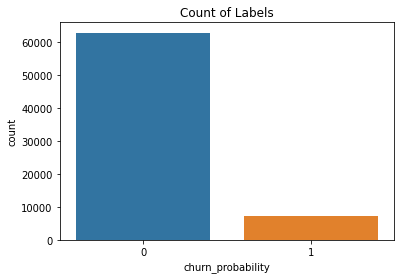

In [ ]:
display(df['churn_probability'].value_counts())
sns.countplot(x='churn_probability',data=df)
plt.title('Count of Labels')
plt.show()

In [ ]:
df1=df1.set_index('id')
df1

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
id,,,,,,,,,,,,,,,,,,,,,
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,...,0,0,0,0,0,1958,0.00,0.00,0.00,0
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,...,1,0,0,0,0,710,0.00,0.00,0.00,0
2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,0.000,...,0,0,0,0,0,882,0.00,0.00,0.00,0
3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,111.095,...,0,0,0,0,0,982,0.00,0.00,0.00,0
4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,101.565,...,0,0,0,1,0,647,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,15.760,410.924,329.136,...,0,0,0,1,0,221,0.00,0.00,0.00,0
69995,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,160.083,289.129,265.772,...,0,0,0,0,0,712,0.00,0.00,0.00,0
69996,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,372.088,258.374,279.782,...,0,0,0,0,0,879,0.00,0.00,0.00,0


In [ ]:
display(df1[df_type1[df_type1=='O'].index].describe())
df1=df1.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis=1)

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
count,69999,69600,69266,68898,68765,67538
unique,1,1,1,30,31,31
top,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/31/2014,8/31/2014
freq,69999,69600,69266,11880,12206,10324


In [ ]:
df1['date_of_last_rech_6'].fillna('6/30/2014',inplace=True)
df1['date_of_last_rech_7'].fillna('7/31/2014',inplace=True)
df1['date_of_last_rech_8'].fillna('8/31/2014',inplace=True)

In [ ]:
for x in ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']:
    df1[x]=pd.to_datetime(df1[x])
df1[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']]

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
id,,,
0,2014-06-22,2014-07-10,2014-08-24
1,2014-06-12,2014-07-10,2014-08-26
2,2014-06-11,2014-07-22,2014-08-24
3,2014-06-15,2014-07-21,2014-08-25
4,2014-06-25,2014-07-26,2014-08-30
...,...,...,...
69994,2014-06-18,2014-07-31,2014-08-31
69995,2014-06-28,2014-07-31,2014-08-27
69996,2014-06-25,2014-07-30,2014-08-29


In [ ]:
df1[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']]
df1['date_of_last_rech_6']=(pd.to_datetime('2014-6-30')-df1['date_of_last_rech_6']).astype('int64')/(3600*24*1000000000)
df1['date_of_last_rech_7']=(pd.to_datetime('2014-7-31')-df1['date_of_last_rech_7']).astype('int64')/(3600*24*1000000000)
df1['date_of_last_rech_8']=(pd.to_datetime('2014-8-31')-df1['date_of_last_rech_8']).astype('int64')/(3600*24*1000000000)
df1[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','churn_probability']].corr()

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.


,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,churn_probability
date_of_last_rech_6,1.000000,0.240030,0.170188,0.026098
date_of_last_rech_7,0.240030,1.000000,0.195634,0.079769
date_of_last_rech_8,0.170188,0.195634,1.000000,0.071983
churn_probability,0.026098,0.079769,0.071983,1.000000


In [ ]:
df1.describe()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.0,69999.0,69999.0,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,...,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,132.978257,...,0.077730,0.081958,0.075344,0.081444,0.085487,1220.639709,68.108597,65.935830,60.07674,0.101887
std,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,293.972404,305.244261,303.534603,...,0.383189,0.381821,0.573003,0.634547,0.680035,952.426321,269.328659,267.899034,257.22681,0.302502
min,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,8.060000,7.260000,7.360000,...,0.000000,0.000000,0.000000,0.000000,0.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,37.730000,35.690000,36.790000,...,0.000000,0.000000,0.000000,0.000000,0.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,133.153275,133.894438,132.978257,...,0.000000,0.000000,0.000000,0.000000,0.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,...,16.000000,16.000000,29.000000,33.000000,41.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [ ]:
def outliers(df,col):
    q1=np.percentile(df[col],25)
    q3=np.percentile(df[col],75)
    iqr=q3-q1
    upper_outliers=q3+1.5*iqr
    lower_outliers=q1-1.5*iqr
    df[col]=[x if x<upper_outliers else upper_outliers for x in df[col]]
    df[col]=[x if x>lower_outliers else lower_outliers for x in df[col]]
    return df[col]

y=df1[['churn_probability']]
for x in df1.columns:
    df1[x]=outliers(df1,x)

df1.describe()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.0,69999.0,69999.0,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,...,69999.0,69999.0,69999.0,69999.0,69999.0,69999.000000,69999.0,69999.0,69999.0,69999.0
mean,109.0,0.0,0.0,0.0,260.681189,255.481879,256.002833,86.231077,85.209744,85.412233,...,0.0,0.0,0.0,0.0,0.0,1220.380484,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,219.650402,219.665103,223.610682,104.234033,105.240274,103.889087,...,0.0,0.0,0.0,0.0,0.0,951.667566,0.0,0.0,0.0,0.0
min,109.0,0.0,0.0,0.0,-322.234000,-331.269250,-344.626000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,180.000000,0.0,0.0,0.0,0.0
25%,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,8.060000,7.260000,7.360000,...,0.0,0.0,0.0,0.0,0.0,468.000000,0.0,0.0,0.0,0.0
50%,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,37.730000,35.690000,36.790000,...,0.0,0.0,0.0,0.0,0.0,868.000000,0.0,0.0,0.0,0.0
75%,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,133.153275,133.894438,132.978257,...,0.0,0.0,0.0,0.0,0.0,1813.000000,0.0,0.0,0.0,0.0
max,109.0,0.0,0.0,0.0,786.606000,783.352750,798.630000,320.793187,323.846096,321.405642,...,0.0,0.0,0.0,0.0,0.0,3830.500000,0.0,0.0,0.0,0.0


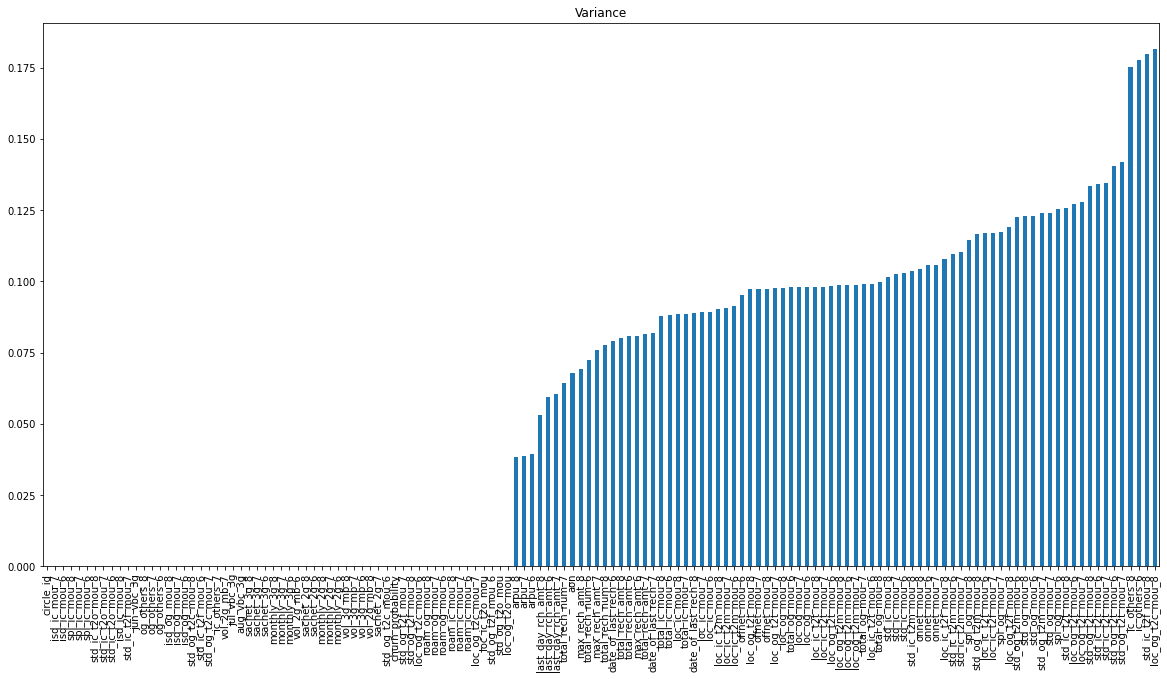

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def variance(df):
    mms=MinMaxScaler()
    summary_statistics=pd.DataFrame(mms.fit_transform(df), columns=df.columns).describe()
    return summary_statistics.loc['std']**2

variance_df=variance(df1)
fig,ax=plt.subplots(figsize=(20,10))
variance_df.sort_values().plot(kind='bar')
plt.title('Variance')
plt.show()

In [ ]:
df2=df1.drop(variance_df[variance_df==0].index,axis=1)
df2.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,...,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,aon
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,...,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,260.681189,255.481879,256.002833,86.231077,85.209744,85.412233,158.787107,155.218240,155.514255,29.303354,...,94.297419,94.586223,99.277433,5.702839,5.238175,4.887198,58.757868,54.886198,58.501593,1220.380484
std,219.650402,219.665103,223.610682,104.234033,105.240274,103.889087,155.393643,154.391137,152.763002,35.886696,...,72.464087,75.675357,82.875738,5.902057,5.294105,4.769916,67.078971,67.611248,74.859942,951.667566
min,-322.234000,-331.269250,-344.626000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000
25%,93.581000,86.714000,84.095000,8.060000,7.260000,7.360000,36.880000,33.980000,34.390000,1.930000,...,30.000000,30.000000,30.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,468.000000
50%,197.484000,191.588000,192.234000,37.730000,35.690000,36.790000,103.830000,98.580000,101.680000,13.230000,...,110.000000,110.000000,98.000000,3.000000,4.000000,4.000000,30.000000,30.000000,30.000000,868.000000
75%,370.791000,365.369500,369.909000,133.153275,133.894438,132.978257,223.540000,218.350000,216.410000,46.904854,...,120.000000,128.000000,144.000000,9.000000,8.000000,7.000000,110.000000,110.000000,130.000000,1813.000000
max,786.606000,783.352750,798.630000,320.793187,323.846096,321.405642,503.530000,494.905000,489.440000,114.367135,...,255.000000,275.000000,315.000000,21.000000,18.500000,16.000000,275.000000,275.000000,325.000000,3830.500000


In [ ]:
df2=pd.concat([df2,y],axis=1)
df2.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,...,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,aon,churn_probability
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,...,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,260.681189,255.481879,256.002833,86.231077,85.209744,85.412233,158.787107,155.218240,155.514255,29.303354,...,94.586223,99.277433,5.702839,5.238175,4.887198,58.757868,54.886198,58.501593,1220.380484,0.101887
std,219.650402,219.665103,223.610682,104.234033,105.240274,103.889087,155.393643,154.391137,152.763002,35.886696,...,75.675357,82.875738,5.902057,5.294105,4.769916,67.078971,67.611248,74.859942,951.667566,0.302502
min,-322.234000,-331.269250,-344.626000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000
25%,93.581000,86.714000,84.095000,8.060000,7.260000,7.360000,36.880000,33.980000,34.390000,1.930000,...,30.000000,30.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,468.000000,0.000000
50%,197.484000,191.588000,192.234000,37.730000,35.690000,36.790000,103.830000,98.580000,101.680000,13.230000,...,110.000000,98.000000,3.000000,4.000000,4.000000,30.000000,30.000000,30.000000,868.000000,0.000000
75%,370.791000,365.369500,369.909000,133.153275,133.894438,132.978257,223.540000,218.350000,216.410000,46.904854,...,128.000000,144.000000,9.000000,8.000000,7.000000,110.000000,110.000000,130.000000,1813.000000,0.000000
max,786.606000,783.352750,798.630000,320.793187,323.846096,321.405642,503.530000,494.905000,489.440000,114.367135,...,275.000000,315.000000,21.000000,18.500000,16.000000,275.000000,275.000000,325.000000,3830.500000,1.000000


In [ ]:
df2[['date_of_last_rech_8','churn_probability']].corr()

,date_of_last_rech_8,churn_probability
date_of_last_rech_8,1.000000,0.068539
churn_probability,0.068539,1.000000


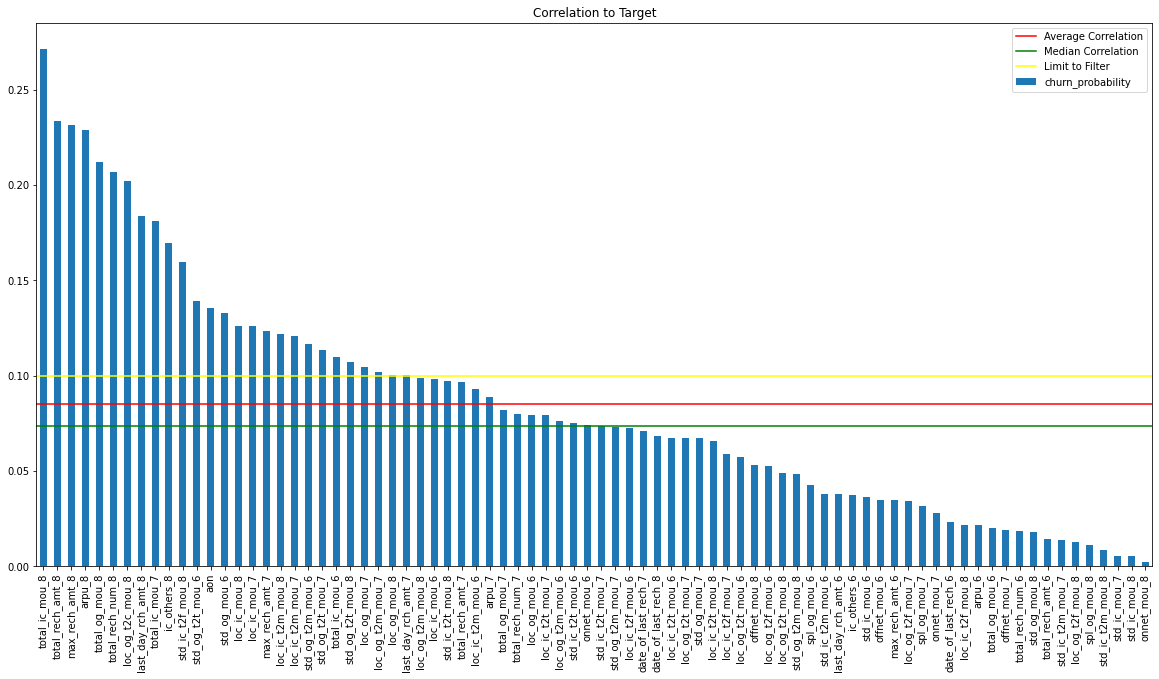

In [ ]:
fig,ax=plt.subplots(figsize=(20,10))
correlation_to_target=abs(df2.corr().loc['churn_probability'])
correlation_to_target.drop('churn_probability',axis=0).sort_values(ascending=False).plot(kind='bar')
plt.axhline(correlation_to_target.drop('churn_probability',axis=0).mean(),color='red',label='Average Correlation')
plt.axhline(correlation_to_target.drop('churn_probability',axis=0).median(),color='green',label='Median Correlation')
plt.axhline(0.1,color='yellow',label='Limit to Filter')
plt.title('Correlation to Target')
plt.legend()
plt.show()

In [ ]:
df3=df2.drop(correlation_to_target[correlation_to_target<0.1].index,axis=1)
df3

,arpu_8,loc_og_t2m_mou_7,loc_og_t2c_mou_8,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_mou_6,...,total_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_7,last_day_rch_amt_8,aon,churn_probability
id,,,,,,,,,,,,,,,,,,,,,
0,7.527,16.04,0.000,16.04,2.61,46.34,116.375,1.010,18.75,65.09,...,40.56,0.00,2.0,10.0,65.0,10.0,65.0,0.0,1958.0,0
1,42.953,0.00,0.375,0.00,0.00,0.00,0.000,0.000,0.00,0.00,...,25.04,0.00,5.0,50.0,145.0,50.0,0.0,0.0,710.0,0
2,0.000,0.00,0.000,12.98,0.00,0.00,2.940,0.000,28.94,28.94,...,36.64,0.20,2.0,0.0,70.0,0.0,50.0,0.0,882.0,0
3,111.095,44.89,0.375,48.84,23.63,0.26,12.060,0.000,15.33,16.16,...,83.84,0.00,3.0,130.0,110.0,50.0,110.0,50.0,982.0,0
4,101.565,19.88,0.000,25.94,15.76,0.00,0.000,0.000,4.35,4.35,...,28.31,0.00,8.0,122.0,41.0,30.0,10.0,30.0,647.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,329.136,60.64,0.375,63.09,96.86,0.00,4.910,3.730,0.00,0.00,...,269.56,0.00,13.0,512.0,110.0,130.0,20.0,130.0,221.0,0
69995,265.772,73.84,0.000,103.96,56.41,109.36,116.375,133.525,9.98,119.34,...,136.01,0.08,9.0,308.0,44.0,44.0,30.0,42.0,712.0,0
69996,279.782,82.58,0.000,268.13,342.29,0.00,24.160,0.000,0.00,0.00,...,414.54,0.00,4.0,397.0,250.0,315.0,250.0,48.0,879.0,0


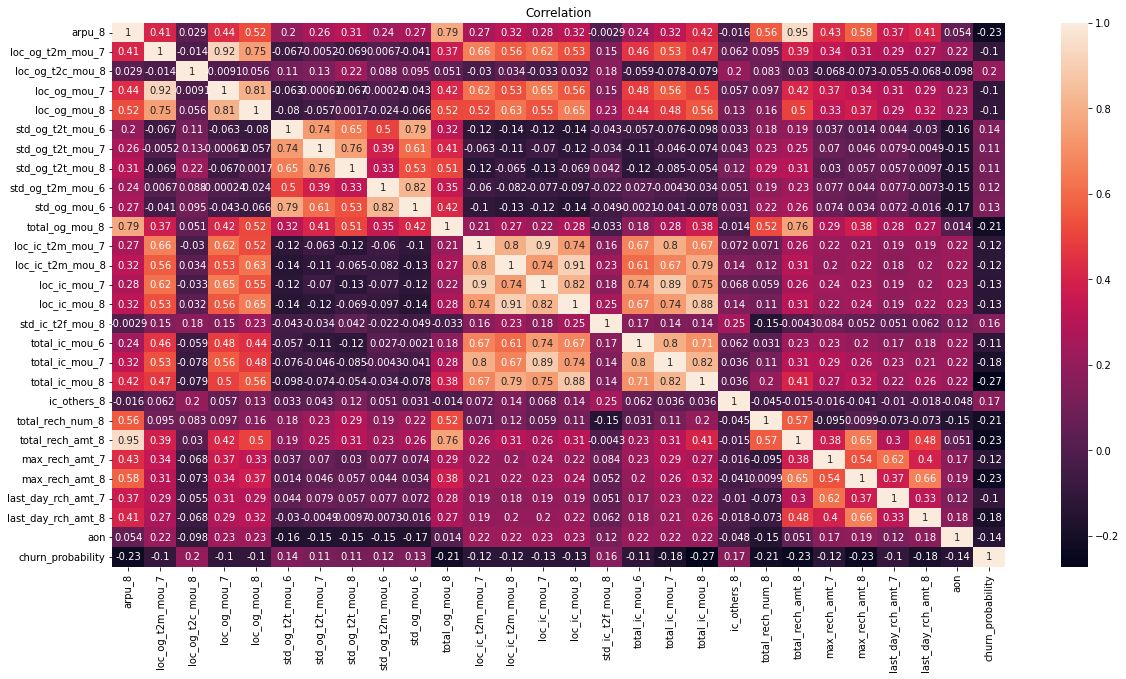

In [ ]:
fig,ax=plt.subplots(figsize=(20,10))
sns.heatmap(df3.corr(),annot=True)
plt.title('Correlation')
plt.show()

In [ ]:
def korelasi(data,threshold):
    col_corr=set()
    corr_matrix=data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
df4=df3.drop(korelasi(df3,0.9),axis=1)
df4

,arpu_8,loc_og_t2m_mou_7,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_mou_6,total_og_mou_8,...,total_ic_mou_7,total_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_7,last_day_rch_amt_8,aon,churn_probability
id,,,,,,,,,,,,,,,,,,,,,
0,7.527,16.04,0.000,2.61,46.34,116.375,1.010,18.75,65.09,3.63,...,53.04,40.56,0.00,2.0,65.0,10.0,65.0,0.0,1958.0,0
1,42.953,0.00,0.375,0.00,0.00,0.000,0.000,0.00,0.00,31.66,...,39.44,25.04,0.00,5.0,145.0,50.0,0.0,0.0,710.0,0
2,0.000,0.00,0.000,0.00,0.00,2.940,0.000,28.94,28.94,0.00,...,33.83,36.64,0.20,2.0,70.0,0.0,50.0,0.0,882.0,0
3,111.095,44.89,0.375,23.63,0.26,12.060,0.000,15.33,16.16,53.84,...,50.18,83.84,0.00,3.0,110.0,50.0,110.0,50.0,982.0,0
4,101.565,19.88,0.000,15.76,0.00,0.000,0.000,4.35,4.35,15.76,...,9.36,28.31,0.00,8.0,41.0,30.0,10.0,30.0,647.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,329.136,60.64,0.375,96.86,0.00,4.910,3.730,0.00,0.00,392.58,...,221.99,269.56,0.00,13.0,110.0,130.0,20.0,130.0,221.0,0
69995,265.772,73.84,0.000,56.41,109.36,116.375,133.525,9.98,119.34,280.69,...,112.43,136.01,0.08,9.0,44.0,44.0,30.0,42.0,712.0,0
69996,279.782,82.58,0.000,342.29,0.00,24.160,0.000,0.00,0.00,342.29,...,416.58,414.54,0.00,4.0,250.0,315.0,250.0,48.0,879.0,0


In [ ]:
df4.columns

Index(['arpu_8', 'loc_og_t2m_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_6', 'std_og_mou_6', 'total_og_mou_8',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'std_ic_t2f_mou_8',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'ic_others_8',
       'total_rech_num_8', 'max_rech_amt_7', 'max_rech_amt_8',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'aon', 'churn_probability'],
      dtype='object')

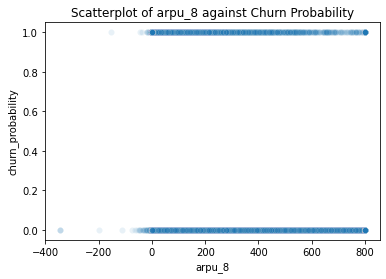

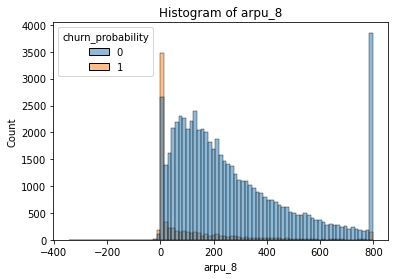

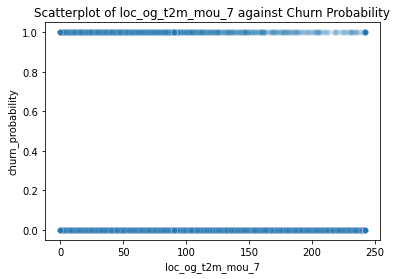

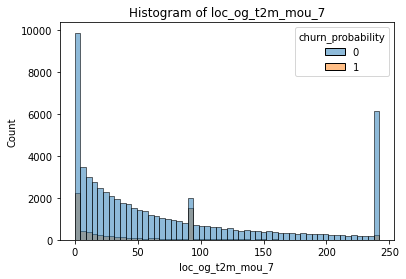

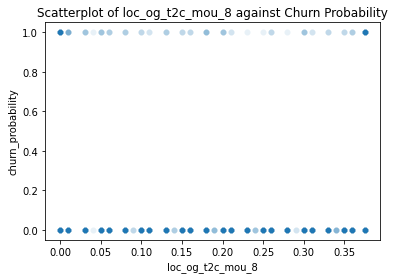

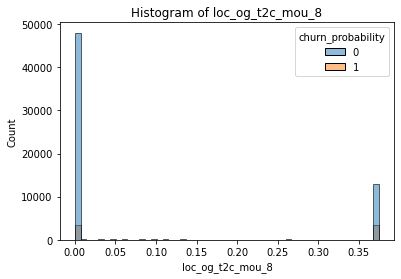

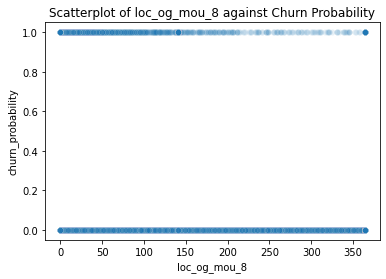

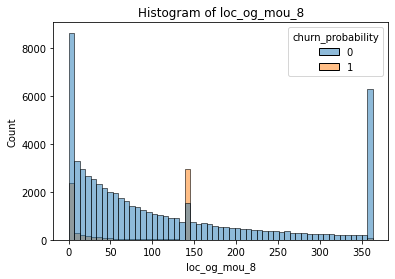

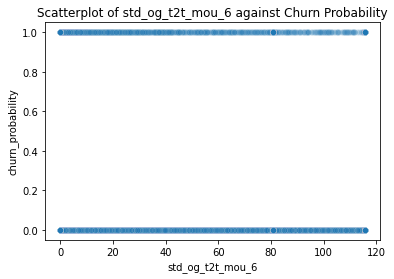

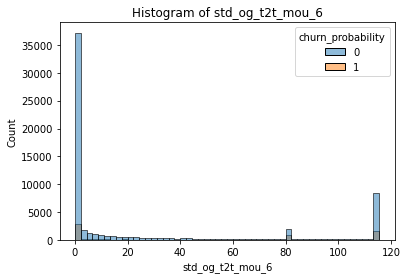

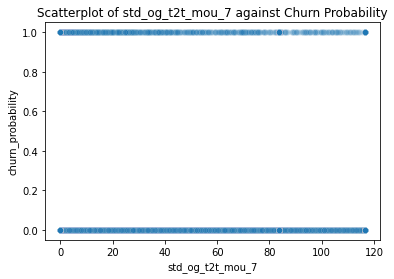

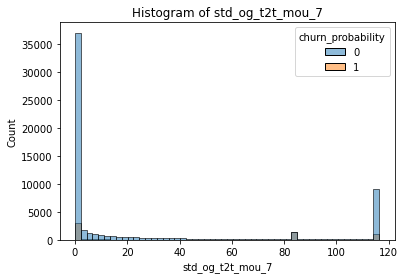

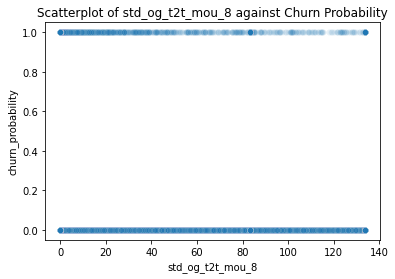

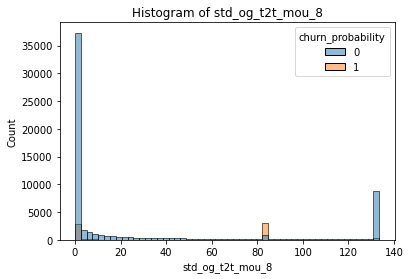

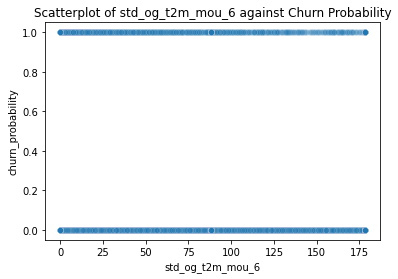

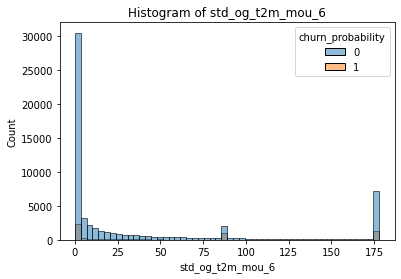

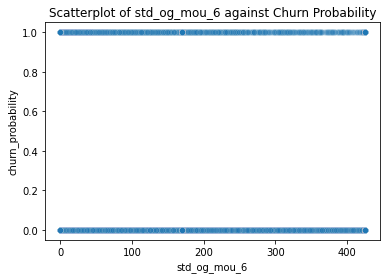

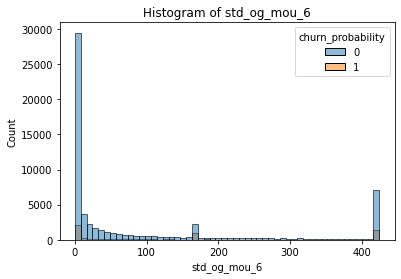

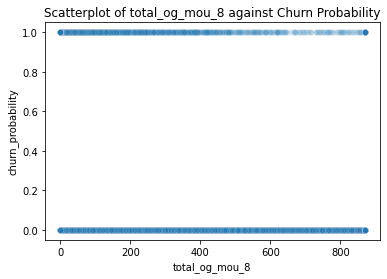

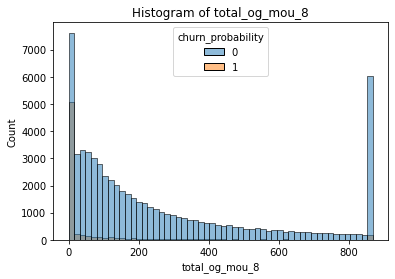

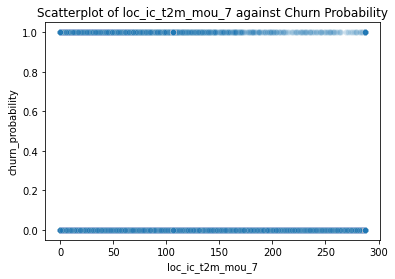

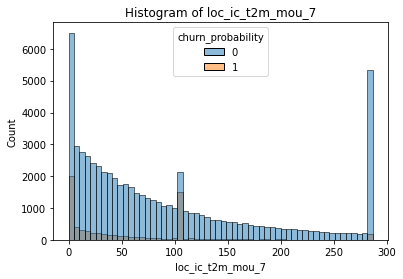

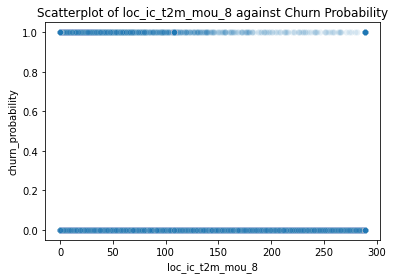

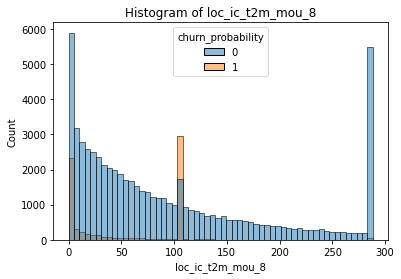

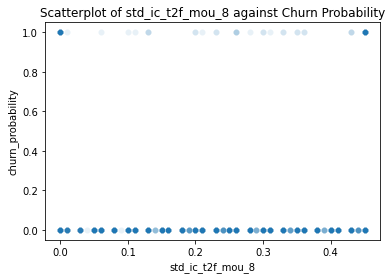

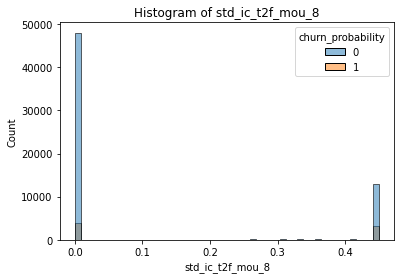

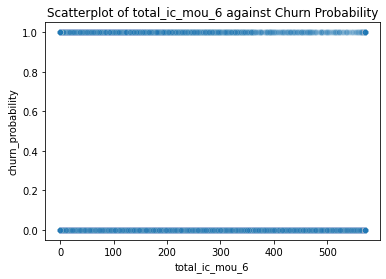

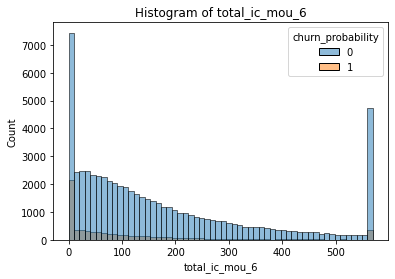

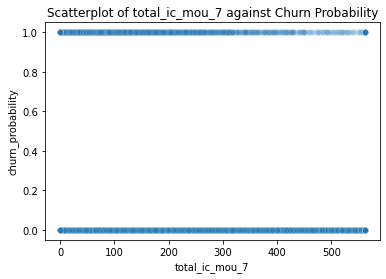

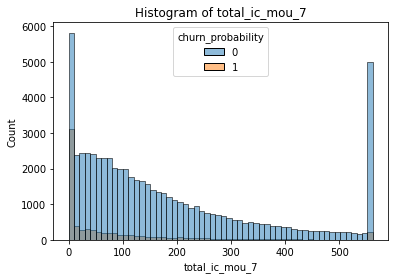

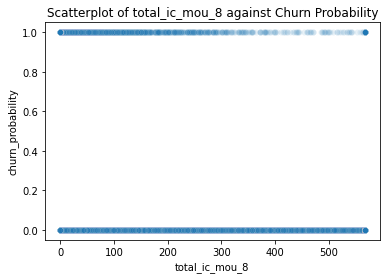

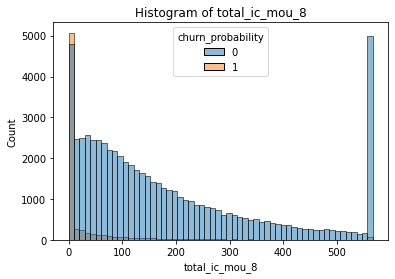

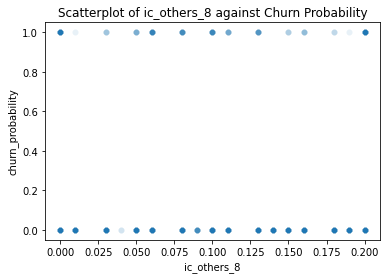

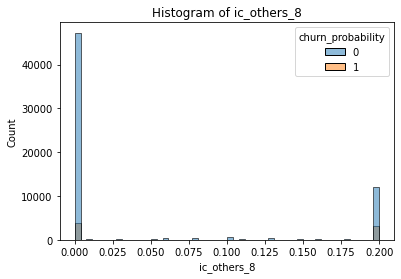

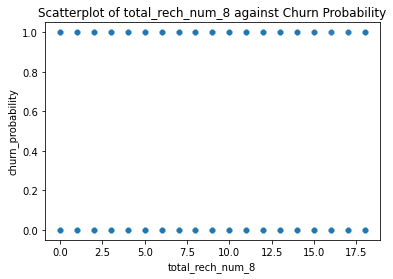

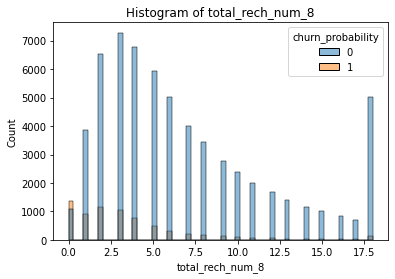

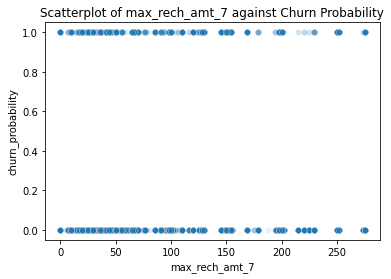

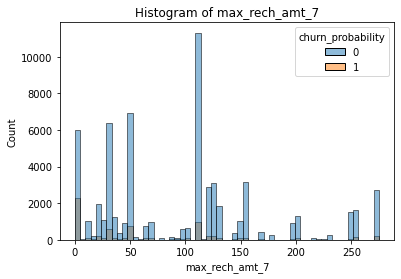

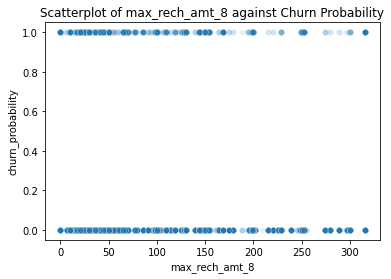

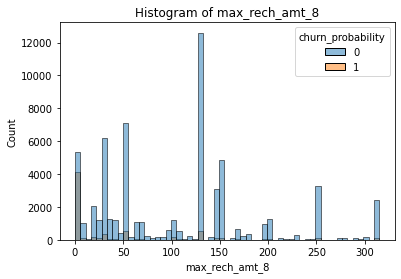

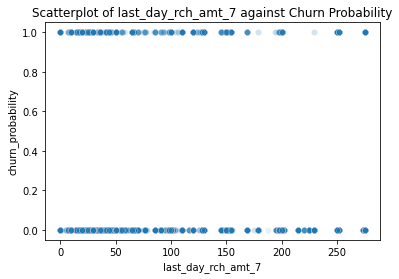

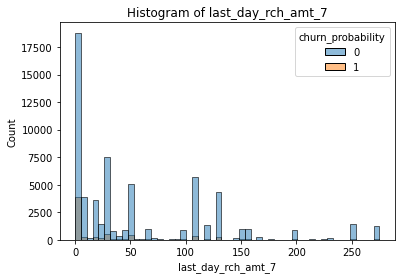

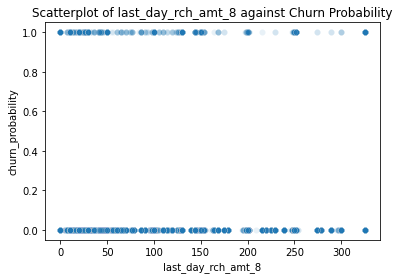

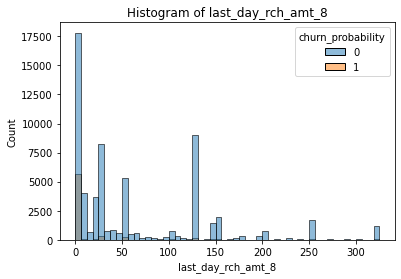

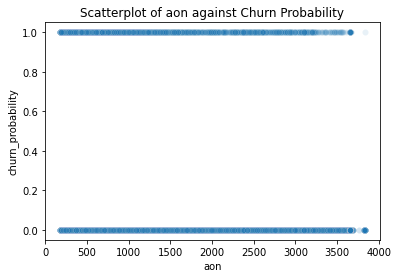

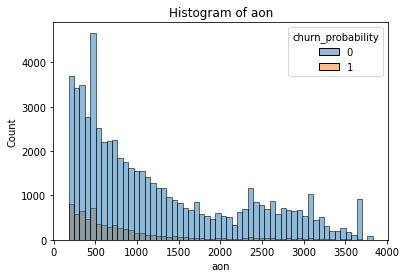

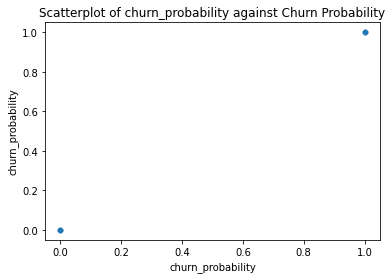

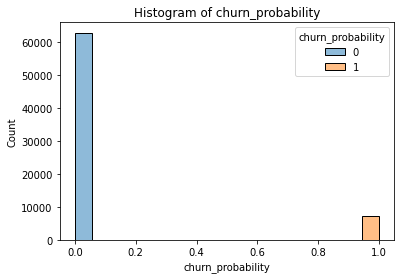

In [ ]:
for x in df4.columns:
    sns.scatterplot(x=x,y='churn_probability',data=df4,alpha=0.1)
    plt.title(f'Scatterplot of {x} against Churn Probability')
    plt.show()
    
    sns.histplot(x=x,data=df4,hue='churn_probability')
    plt.title(f'Histogram of {x}')
    plt.show()

# Modelling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

df4=df4.reset_index(drop=True)
X=df4.drop('churn_probability',axis=1)
y=df4[['churn_probability']]

oversample = RandomOverSampler(sampling_strategy=0.5)

X_over,y_over=oversample.fit_resample(X,y)

churn_probability
0                    62867
1                     7132
dtype: int64

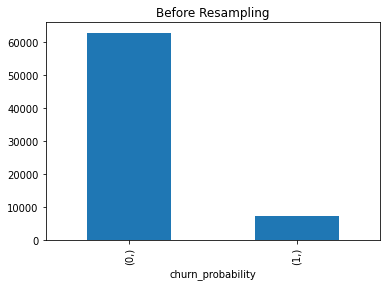

churn_probability
0                    62867
1                    31433
dtype: int64

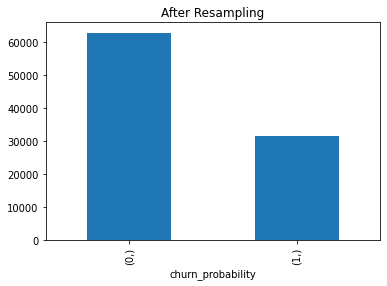

In [ ]:
display(y.value_counts())
y.value_counts().plot(kind='bar')
plt.title('Before Resampling')
plt.show()

display(y_over.value_counts())
y_over.value_counts().plot(kind='bar')
plt.title('After Resampling')
plt.show()

In [ ]:
62867/7132

8.814778463264162

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_over,y_over,test_size=0.3,stratify=y_over)

In [ ]:
y_train=y_train.values.ravel()
y_test=y_test.values.ravel()

In [ ]:
#Model 1: XGBoost
import xgboost as xgb
from sklearn.metrics import roc_auc_score,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score,GridSearchCV


#Menginisiasi Model
model_prototype = xgb.XGBClassifier(objective ='binary:logistic', n_estimators = 100,
                                    use_label_encoder=False,eval_metric='mlogloss',max_depth=6,learning_rate=0.05)


model_prototype.fit(X_train,y_train)

#Melakukan Prediksi
proba=model_prototype.predict_proba(X_test)[:,1]
pred=model_prototype.predict(X_test)

#Evaluasi Model
TN, FP, FN, TP = confusion_matrix(y_test,pred).ravel()


def cm_score(tn,fp,fn,tp):
    tpr=tp/(tp+fn)
    tnr=tn/(tn+fp)
    ppv=tp/(tp+fp)
    npv=tn/(tn+fn)
    fpr=fp/(fp+tn)
    fnr=fn/(tp+fn)
    fdr=fp/(tp+fp)
    return tpr,tnr,ppv,npv,fpr,fnr,fdr

TPR,TNR,PPV,NPV,FPR,FNR,FDR=cm_score(TN, FP, FN, TP)

print('True Negative:',TN)
print('False Positive:',FP)
print('False Negative:',FN)
print('True Positive:',TP)
print('Recall:',TPR)
print('False Positive Rate:',FPR)
print('Precision:',PPV)
print('Specificity:',TNR)

auc_score_train=roc_auc_score(y_train,model_prototype.predict_proba(X_train)[:,1])
auc_score_test=roc_auc_score(y_test,proba)

print('AUC Score training data:',auc_score_train)
print('AUC Score test data:',auc_score_test)

cv=cross_val_score(model_prototype,X_test,y_test,cv=5)
print('AUC Score Cross-Validation:',cv.mean())
print('Accuracy:',accuracy_score(y_test,pred))

True Negative: 17902
False Positive: 958
False Negative: 2083
True Positive: 7347
Recall: 0.7791092258748674
False Positive Rate: 0.05079533404029692
Precision: 0.8846478025285972
Specificity: 0.9492046659597031
AUC Score training data: 0.9582522435279482
AUC Score test data: 0.9495247197354172
AUC Score Cross-Validation: 0.8891834570519619
Accuracy: 0.8925061859314245


In [ ]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

space={'max_depth': hp.quniform("max_depth", 3, 8, 1),
        'learning_rate': hp.quniform ('learning_rate', 0.05,0.5,0.01),
        'n_estimators' : hp.quniform('n_estimators', 50,500,50)
    }

def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =int(space['n_estimators']), max_depth = int(space['max_depth']), learning_rate = space['learning_rate'])
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
#trials = Trials()

#best_hyperparams = fmin(fn = objective,
                        #space = space,
                        #algo = tpe.suggest,
                        #max_evals = 100,
                        #trials = trials)

In [ ]:
#best_hyperparams

In [ ]:
#Model 1: XGBoost
import xgboost as xgb
from sklearn.metrics import roc_auc_score,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score,GridSearchCV


#Menginisiasi Model
model_prototype = xgb.XGBClassifier(objective ='binary:logistic', n_estimators = 500,
                                    use_label_encoder=False,eval_metric='mlogloss',max_depth=6,learning_rate=0.25)


model_prototype.fit(X_train,y_train)

#Melakukan Prediksi
proba=model_prototype.predict_proba(X_test)[:,1]
pred=model_prototype.predict(X_test)

#Evaluasi Model
TN, FP, FN, TP = confusion_matrix(y_test,pred).ravel()


def cm_score(tn,fp,fn,tp):
    tpr=tp/(tp+fn)
    tnr=tn/(tn+fp)
    ppv=tp/(tp+fp)
    npv=tn/(tn+fn)
    fpr=fp/(fp+tn)
    fnr=fn/(tp+fn)
    fdr=fp/(tp+fp)
    return tpr,tnr,ppv,npv,fpr,fnr,fdr

TPR,TNR,PPV,NPV,FPR,FNR,FDR=cm_score(TN, FP, FN, TP)

print('True Negative:',TN)
print('False Positive:',FP)
print('False Negative:',FN)
print('True Positive:',TP)
print('Recall:',TPR)
print('False Positive Rate:',FPR)
print('Precision:',PPV)
print('Specificity:',TNR)

auc_score_train=roc_auc_score(y_train,model_prototype.predict_proba(X_train)[:,1])
auc_score_test=roc_auc_score(y_test,proba)

print('AUC Score training data:',auc_score_train)
print('AUC Score test data:',auc_score_test)

cv=cross_val_score(model_prototype,X_test,y_test,cv=5)
print('AUC Score Cross-Validation:',cv.mean())
print('Accuracy:',accuracy_score(y_test,pred))

True Negative: 18137
False Positive: 723
False Negative: 158
True Positive: 9272
Recall: 0.9832449628844114
False Positive Rate: 0.03833510074231177
Precision: 0.927663831915958
Specificity: 0.9616648992576883
AUC Score training data: 0.9996417670063628
AUC Score test data: 0.9895722233030343
AUC Score Cross-Validation: 0.9306468716861082
Accuracy: 0.9688582537999293


In [ ]:
import shap

explainer = shap.Explainer(model_prototype)
shap_values = explainer(X_test)

# visualize the first prediction's explanation
#shap.plots.waterfall(shap_values[0])

In [ ]:
#pip install javascript

In [ ]:
shap.initjs()
shap.plots.force(shap_values[0])

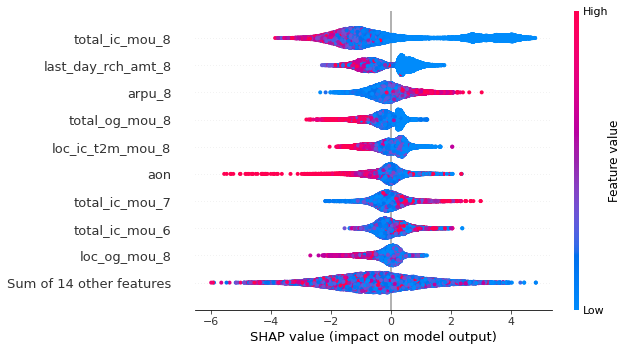

In [ ]:
shap.initjs()
shap.plots.beeswarm(shap_values)

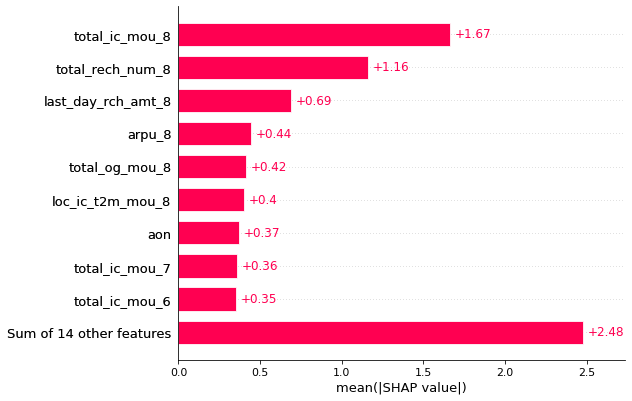

In [ ]:
shap.initjs()
shap.plots.bar(shap_values)